In [1002]:
import nltk
#https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/
#https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/

In [1003]:
import keras

In [1004]:
from attentionLSTM import AttentionLSTM

In [1005]:
from keras.preprocessing.text import Tokenizer

In [1006]:
import numpy as np
from matplotlib import pyplot

In [1007]:
from pandas import DataFrame

In [1008]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional
from keras.layers import TimeDistributed

In [1009]:

# source text
data1 = """ Jack and Jill went up the hill\n
            To fetch a pail of water\n
        Jack fell down and broke his crown\n
        And Jill came tumbling after\n """


data = """ Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary."""

In [1010]:
tokenizer = Tokenizer()

In [1011]:
t = tokenizer.fit_on_texts([data])
t

In [1012]:
tokenizer.texts_to_sequences([data])

[[21,
  1,
  22,
  23,
  3,
  24,
  25,
  26,
  1,
  5,
  27,
  10,
  11,
  4,
  3,
  28,
  7,
  2,
  1,
  12,
  8,
  13,
  9,
  29,
  2,
  1,
  5,
  14,
  6,
  30,
  15,
  4,
  3,
  31,
  7,
  2,
  32,
  16,
  33,
  34,
  16,
  1,
  35,
  36,
  37,
  38,
  39,
  40,
  17,
  1,
  5,
  14,
  4,
  1,
  18,
  2,
  1,
  41,
  42,
  13,
  43,
  1,
  18,
  4,
  1,
  19,
  3,
  44,
  45,
  2,
  46,
  6,
  47,
  15,
  4,
  3,
  48,
  2,
  1,
  19,
  20,
  49,
  50,
  51,
  1,
  12,
  8,
  52,
  53,
  17,
  54,
  55,
  56,
  9,
  57,
  20,
  1,
  58,
  2,
  1,
  5,
  59,
  6,
  9,
  3,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  6,
  1,
  10,
  11,
  4,
  3,
  67,
  68,
  69,
  7,
  2,
  8]]

In [1013]:
encoded = tokenizer.texts_to_sequences([data])[0]

In [1014]:
encoded

[21,
 1,
 22,
 23,
 3,
 24,
 25,
 26,
 1,
 5,
 27,
 10,
 11,
 4,
 3,
 28,
 7,
 2,
 1,
 12,
 8,
 13,
 9,
 29,
 2,
 1,
 5,
 14,
 6,
 30,
 15,
 4,
 3,
 31,
 7,
 2,
 32,
 16,
 33,
 34,
 16,
 1,
 35,
 36,
 37,
 38,
 39,
 40,
 17,
 1,
 5,
 14,
 4,
 1,
 18,
 2,
 1,
 41,
 42,
 13,
 43,
 1,
 18,
 4,
 1,
 19,
 3,
 44,
 45,
 2,
 46,
 6,
 47,
 15,
 4,
 3,
 48,
 2,
 1,
 19,
 20,
 49,
 50,
 51,
 1,
 12,
 8,
 52,
 53,
 17,
 54,
 55,
 56,
 9,
 57,
 20,
 1,
 58,
 2,
 1,
 5,
 59,
 6,
 9,
 3,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 6,
 1,
 10,
 11,
 4,
 3,
 67,
 68,
 69,
 7,
 2,
 8]

In [1015]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'a': 3,
 'is': 4,
 'main': 5,
 'and': 6,
 'statue': 7,
 'mary': 8,
 'in': 9,
 'gold': 10,
 'dome': 11,
 'virgin': 12,
 'immediately': 13,
 'building': 14,
 'it': 15,
 'with': 16,
 'to': 17,
 'basilica': 18,
 'grotto': 19,
 'at': 20,
 'architecturally': 21,
 'school': 22,
 'has': 23,
 'catholic': 24,
 'character': 25,
 'atop': 26,
 "building's": 27,
 'golden': 28,
 'front': 29,
 'facing': 30,
 'copper': 31,
 'christ': 32,
 'arms': 33,
 'upraised': 34,
 'legend': 35,
 'venite': 36,
 'ad': 37,
 'me': 38,
 'omnes': 39,
 'next': 40,
 'sacred': 41,
 'heart': 42,
 'behind': 43,
 'marian': 44,
 'place': 45,
 'prayer': 46,
 'reflection': 47,
 'replica': 48,
 'lourdes': 49,
 'france': 50,
 'where': 51,
 'reputedly': 52,
 'appeared': 53,
 'saint': 54,
 'bernadette': 55,
 'soubirous': 56,
 '1858': 57,
 'end': 58,
 'drive': 59,
 'direct': 60,
 'line': 61,
 'that': 62,
 'connects': 63,
 'through': 64,
 '3': 65,
 'statues': 66,
 'simple': 67,
 'modern': 68,
 'stone': 69}

In [1016]:
vocab_size= len(tokenizer.word_index)+1

In [1017]:
vocab_size


70

In [1018]:
#create sequences
sequences=list()
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)
print('Total sequences: %d' % len(sequences))

Total sequences: 123


In [1019]:
sequences

[[21, 1],
 [1, 22],
 [22, 23],
 [23, 3],
 [3, 24],
 [24, 25],
 [25, 26],
 [26, 1],
 [1, 5],
 [5, 27],
 [27, 10],
 [10, 11],
 [11, 4],
 [4, 3],
 [3, 28],
 [28, 7],
 [7, 2],
 [2, 1],
 [1, 12],
 [12, 8],
 [8, 13],
 [13, 9],
 [9, 29],
 [29, 2],
 [2, 1],
 [1, 5],
 [5, 14],
 [14, 6],
 [6, 30],
 [30, 15],
 [15, 4],
 [4, 3],
 [3, 31],
 [31, 7],
 [7, 2],
 [2, 32],
 [32, 16],
 [16, 33],
 [33, 34],
 [34, 16],
 [16, 1],
 [1, 35],
 [35, 36],
 [36, 37],
 [37, 38],
 [38, 39],
 [39, 40],
 [40, 17],
 [17, 1],
 [1, 5],
 [5, 14],
 [14, 4],
 [4, 1],
 [1, 18],
 [18, 2],
 [2, 1],
 [1, 41],
 [41, 42],
 [42, 13],
 [13, 43],
 [43, 1],
 [1, 18],
 [18, 4],
 [4, 1],
 [1, 19],
 [19, 3],
 [3, 44],
 [44, 45],
 [45, 2],
 [2, 46],
 [46, 6],
 [6, 47],
 [47, 15],
 [15, 4],
 [4, 3],
 [3, 48],
 [48, 2],
 [2, 1],
 [1, 19],
 [19, 20],
 [20, 49],
 [49, 50],
 [50, 51],
 [51, 1],
 [1, 12],
 [12, 8],
 [8, 52],
 [52, 53],
 [53, 17],
 [17, 54],
 [54, 55],
 [55, 56],
 [56, 9],
 [9, 57],
 [57, 20],
 [20, 1],
 [1, 58],
 [58, 2],
 [2

In [1020]:
# split into X and y elements
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]

In [1021]:
X

array([21,  1, 22, 23,  3, 24, 25, 26,  1,  5, 27, 10, 11,  4,  3, 28,  7,
        2,  1, 12,  8, 13,  9, 29,  2,  1,  5, 14,  6, 30, 15,  4,  3, 31,
        7,  2, 32, 16, 33, 34, 16,  1, 35, 36, 37, 38, 39, 40, 17,  1,  5,
       14,  4,  1, 18,  2,  1, 41, 42, 13, 43,  1, 18,  4,  1, 19,  3, 44,
       45,  2, 46,  6, 47, 15,  4,  3, 48,  2,  1, 19, 20, 49, 50, 51,  1,
       12,  8, 52, 53, 17, 54, 55, 56,  9, 57, 20,  1, 58,  2,  1,  5, 59,
        6,  9,  3, 60, 61, 62, 63, 64, 65, 66,  6,  1, 10, 11,  4,  3, 67,
       68, 69,  7,  2])

In [1022]:
y

array([ 1, 22, 23,  3, 24, 25, 26,  1,  5, 27, 10, 11,  4,  3, 28,  7,  2,
        1, 12,  8, 13,  9, 29,  2,  1,  5, 14,  6, 30, 15,  4,  3, 31,  7,
        2, 32, 16, 33, 34, 16,  1, 35, 36, 37, 38, 39, 40, 17,  1,  5, 14,
        4,  1, 18,  2,  1, 41, 42, 13, 43,  1, 18,  4,  1, 19,  3, 44, 45,
        2, 46,  6, 47, 15,  4,  3, 48,  2,  1, 19, 20, 49, 50, 51,  1, 12,
        8, 52, 53, 17, 54, 55, 56,  9, 57, 20,  1, 58,  2,  1,  5, 59,  6,
        9,  3, 60, 61, 62, 63, 64, 65, 66,  6,  1, 10, 11,  4,  3, 67, 68,
       69,  7,  2,  8])

In [1023]:
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)

In [1024]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [1025]:
attn_vector = np.ones(22)


In [1026]:
#define model
global model
model =Sequential()

In [1027]:
embed = Embedding(vocab_size, 10, input_length=1)

In [1028]:
model.add(embed)

In [1029]:
#model.add(AttentionLSTM(150, embed))

In [1030]:
bi=Bidirectional(LSTM(50, return_sequences=True),input_shape=(2, 1), merge_mode='concat')

In [1031]:
model.add(LSTM(50))

#model.add(bi)
#print(bi.output_shape)

In [1032]:
#model.add(Flatten())

In [1033]:
#print(data.shape)
den=Dense(vocab_size, activation='softmax')
#den = TimeDistributed(Dense(20, activation='sigmoid')) #need to flatten
#model.add(AttentionDecoder(150, n_features))


In [1034]:
model.add(den)
print(den.input_shape)

(None, 50)


In [1035]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 1, 10)             700       
_________________________________________________________________
lstm_36 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dense_17 (Dense)             (None, 70)                3570      
Total params: 16,470
Trainable params: 16,470
Non-trainable params: 0
_________________________________________________________________
None


In [1036]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1037]:
def get_loss():
    loss=list()
    hist =model.fit(X,y, epochs=500, verbose=2)  
    #loss.append(hist.history['loss'][0])
    for x in hist.history['loss']:
        loss.append(x)
    return loss

In [1038]:
results = DataFrame()
results['loss bi'] = get_loss()


Epoch 1/500
 - 14s - loss: 0.0749 - acc: 0.9857
Epoch 2/500
 - 0s - loss: 0.0748 - acc: 0.9857
Epoch 3/500
 - 0s - loss: 0.0748 - acc: 0.9857
Epoch 4/500
 - 0s - loss: 0.0748 - acc: 0.9857
Epoch 5/500
 - 0s - loss: 0.0747 - acc: 0.9857
Epoch 6/500
 - 0s - loss: 0.0747 - acc: 0.9857
Epoch 7/500
 - 0s - loss: 0.0746 - acc: 0.9857
Epoch 8/500
 - 0s - loss: 0.0746 - acc: 0.9857
Epoch 9/500
 - 0s - loss: 0.0745 - acc: 0.9857
Epoch 10/500
 - 0s - loss: 0.0745 - acc: 0.9857
Epoch 11/500
 - 0s - loss: 0.0744 - acc: 0.9857
Epoch 12/500
 - 0s - loss: 0.0744 - acc: 0.9857
Epoch 13/500
 - 0s - loss: 0.0743 - acc: 0.9857
Epoch 14/500
 - 0s - loss: 0.0742 - acc: 0.9857
Epoch 15/500
 - 0s - loss: 0.0742 - acc: 0.9857
Epoch 16/500
 - 0s - loss: 0.0741 - acc: 0.9857
Epoch 17/500
 - 0s - loss: 0.0740 - acc: 0.9857
Epoch 18/500
 - 0s - loss: 0.0739 - acc: 0.9857
Epoch 19/500
 - 0s - loss: 0.0738 - acc: 0.9857
Epoch 20/500
 - 0s - loss: 0.0737 - acc: 0.9857
Epoch 21/500
 - 0s - loss: 0.0735 - acc: 0.9857


Epoch 171/500
 - 0s - loss: 0.0295 - acc: 0.9900
Epoch 172/500
 - 0s - loss: 0.0293 - acc: 0.9900
Epoch 173/500
 - 0s - loss: 0.0290 - acc: 0.9900
Epoch 174/500
 - 0s - loss: 0.0288 - acc: 0.9901
Epoch 175/500
 - 0s - loss: 0.0286 - acc: 0.9901
Epoch 176/500
 - 0s - loss: 0.0284 - acc: 0.9901
Epoch 177/500
 - 0s - loss: 0.0282 - acc: 0.9901
Epoch 178/500
 - 0s - loss: 0.0280 - acc: 0.9901
Epoch 179/500
 - 0s - loss: 0.0278 - acc: 0.9901
Epoch 180/500
 - 0s - loss: 0.0276 - acc: 0.9902
Epoch 181/500
 - 0s - loss: 0.0274 - acc: 0.9904
Epoch 182/500
 - 0s - loss: 0.0272 - acc: 0.9905
Epoch 183/500
 - 0s - loss: 0.0270 - acc: 0.9906
Epoch 184/500
 - 0s - loss: 0.0268 - acc: 0.9906
Epoch 185/500
 - 0s - loss: 0.0266 - acc: 0.9906
Epoch 186/500
 - 0s - loss: 0.0264 - acc: 0.9907
Epoch 187/500
 - 0s - loss: 0.0262 - acc: 0.9907
Epoch 188/500
 - 0s - loss: 0.0260 - acc: 0.9907
Epoch 189/500
 - 0s - loss: 0.0258 - acc: 0.9907
Epoch 190/500
 - 0s - loss: 0.0257 - acc: 0.9907
Epoch 191/500
 - 0s 

 - 0s - loss: 0.0166 - acc: 0.9930
Epoch 339/500
 - 0s - loss: 0.0166 - acc: 0.9931
Epoch 340/500
 - 0s - loss: 0.0166 - acc: 0.9931
Epoch 341/500
 - 0s - loss: 0.0165 - acc: 0.9930
Epoch 342/500
 - 0s - loss: 0.0165 - acc: 0.9931
Epoch 343/500
 - 0s - loss: 0.0165 - acc: 0.9930
Epoch 344/500
 - 0s - loss: 0.0165 - acc: 0.9931
Epoch 345/500
 - 0s - loss: 0.0165 - acc: 0.9931
Epoch 346/500
 - 0s - loss: 0.0165 - acc: 0.9931
Epoch 347/500
 - 0s - loss: 0.0164 - acc: 0.9931
Epoch 348/500
 - 0s - loss: 0.0164 - acc: 0.9931
Epoch 349/500
 - 0s - loss: 0.0164 - acc: 0.9931
Epoch 350/500
 - 0s - loss: 0.0164 - acc: 0.9931
Epoch 351/500
 - 0s - loss: 0.0164 - acc: 0.9930
Epoch 352/500
 - 0s - loss: 0.0164 - acc: 0.9931
Epoch 353/500
 - 0s - loss: 0.0164 - acc: 0.9931
Epoch 354/500
 - 0s - loss: 0.0164 - acc: 0.9927
Epoch 355/500
 - 0s - loss: 0.0164 - acc: 0.9929
Epoch 356/500
 - 0s - loss: 0.0163 - acc: 0.9930
Epoch 357/500
 - 0s - loss: 0.0163 - acc: 0.9930
Epoch 358/500
 - 0s - loss: 0.0163

In [1039]:
print(results)

      loss bi
0    0.074873
1    0.074832
2    0.074794
3    0.074756
4    0.074716
5    0.074674
6    0.074632
7    0.074588
8    0.074539
9    0.074488
10   0.074433
11   0.074375
12   0.074310
13   0.074243
14   0.074167
15   0.074082
16   0.073990
17   0.073897
18   0.073796
19   0.073670
20   0.073544
21   0.073411
22   0.073253
23   0.073087
24   0.072883
25   0.072706
26   0.072464
27   0.072214
28   0.071947
29   0.071666
..        ...
470  0.015695
471  0.015681
472  0.015677
473  0.015684
474  0.015688
475  0.015687
476  0.015687
477  0.015663
478  0.015674
479  0.015681
480  0.015681
481  0.015674
482  0.015663
483  0.015657
484  0.015661
485  0.015655
486  0.015654
487  0.015651
488  0.015664
489  0.015643
490  0.015647
491  0.015654
492  0.015642
493  0.015641
494  0.015643
495  0.015630
496  0.015625
497  0.015648
498  0.015625
499  0.015635

[500 rows x 1 columns]


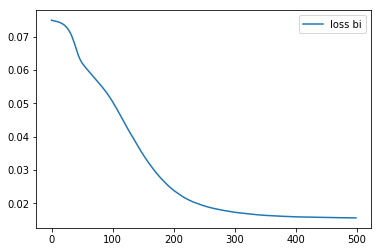

In [1040]:
results.plot()
pyplot.show()

In [1042]:
# evaluate
in_text = 'Mary'
print(in_text)
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
yhat = model.predict_classes(encoded, verbose=0)
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)

Mary
reputedly


In [1043]:
def get_encoded_word(word):
    encoded = tokenizer.texts_to_sequences([word])[0]
    return np.array(encoded)

In [1044]:
def get_next_word(encoded_word, model=model):
    #print(model.summary())
    yht = model.predict_classes(encoded_word, verbose = 0)
    for word, index in tokenizer.word_index.items():
        if index == yht:
            return(word)
    return null

In [1045]:
def get_next_sequence(w, tokenizer, model=model, nwords=1):
    predicted = w
    for _ in range(nwords):
        #encoded = get_encoded_word(w)
        yht = model.predict_classes(get_encoded_word(w), verbose=0)
        current =''
        for word, index in tokenizer.word_index.items():
            if index ==yht:
                current = word
                break
        predicted+=(" "+word)
        w=current
    return predicted

In [1048]:
get_next_word(get_encoded_word('Mary'), model)

'reputedly'

In [1049]:
get_next_sequence('mary', tokenizer, model, 6)

'mary reputedly appeared to the main building'

In [1050]:
encoded

array([8])

In [1051]:
yhat

array([52])

In [1052]:
np.array(tokenizer.texts_to_sequences([in_text])[0])

array([8])

In [1053]:
tokenizer.word_index.items()

dict_items([('the', 1), ('of', 2), ('a', 3), ('is', 4), ('main', 5), ('and', 6), ('statue', 7), ('mary', 8), ('in', 9), ('gold', 10), ('dome', 11), ('virgin', 12), ('immediately', 13), ('building', 14), ('it', 15), ('with', 16), ('to', 17), ('basilica', 18), ('grotto', 19), ('at', 20), ('architecturally', 21), ('school', 22), ('has', 23), ('catholic', 24), ('character', 25), ('atop', 26), ("building's", 27), ('golden', 28), ('front', 29), ('facing', 30), ('copper', 31), ('christ', 32), ('arms', 33), ('upraised', 34), ('legend', 35), ('venite', 36), ('ad', 37), ('me', 38), ('omnes', 39), ('next', 40), ('sacred', 41), ('heart', 42), ('behind', 43), ('marian', 44), ('place', 45), ('prayer', 46), ('reflection', 47), ('replica', 48), ('lourdes', 49), ('france', 50), ('where', 51), ('reputedly', 52), ('appeared', 53), ('saint', 54), ('bernadette', 55), ('soubirous', 56), ('1858', 57), ('end', 58), ('drive', 59), ('direct', 60), ('line', 61), ('that', 62), ('connects', 63), ('through', 64), (

In [1054]:
#tokenizer.texts_to_sequences(['jack'])
tokenizer.sequences_to_texts([[2]])

['of']

In [1055]:
#generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                #out_word = tokenizer.sequences_to_texts([[index]])[0] #this works too
                break
        # append to input
        in_text += ' ' + out_word
    return in_text

In [1056]:
max_length = max([len(seq) for seq in sequences])

In [1058]:
#print(generate_seq(model, tokenizer, max_length-1, 'When did Jack fall?', 3))
print(generate_seq(model, tokenizer, max_length-1, 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?', 20))


To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France? where the main building is a marian place of the main building is a marian place of the main building


In [ ]:
from attention_decoder import AttentionDecoder
from attention_decoder import _time_distributed_dense

In [ ]:
# define the encoder-decoder with attention model
def attention_model(n_timesteps_in, n_features):
    model = Sequential()
    #model.add(LSTM(150, input_shape=(n_timesteps_in, n_features), return_sequences=True))
    model.add(Bidirectional(LSTM(150, return_sequences=True), input_shape=(n_timesteps, n_features), merge_mode=mode))
    #model.add(AttentionDecoder(150, n_features))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
# train and evaluate a model, return accuracy
def train_evaluate_model(model, n_timesteps_in, n_timesteps_out, n_features):
    # train LSTM
    for epoch in range(5000):
        # generate new random sequence
        X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
        # fit model for one epoch on this sequence
        model.fit(X, y, epochs=1, verbose=0)
    # evaluate LSTM
    total, correct = 100, 0
    for _ in range(total):
        X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
        yhat = model.predict(X, verbose=0)
        if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
            correct += 1        
    return float(correct)/float(total)*100.0

In [ ]:
# configure problem
n_features = vocab_size
n_timesteps_in = 5
n_timesteps_out = 2
n_repeats = 10

In [ ]:
print('Encoder-Decoder With Attention Model')
results = list()
for _ in range(n_repeats):
	model = attention_model(n_timesteps_in, n_features)
	accuracy = train_evaluate_model(model, n_timesteps_in, n_timesteps_out, n_features)
	results.append(accuracy)
	print(accuracy)
print('Mean Accuracy: %.2f%%' % (sum(results)/float(n_repeats)))

In [ ]:
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data)
#sns.heatmap(np.asmatrix(data), np.asmatrix(generate_seq(model, tokenizer, max_length-1, 'When did Jack fall?', 3)))
#sns.heatmap(np.asmatrix(data), np.asmatrix(data))
#np.asanyarray(data)
#encoded
sns.heatmap()


In [ ]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
flights = sns.load_dataset("flights")


In [ ]:
type(flights)

In [ ]:
flights.head(3)

In [ ]:
#sns.heatmap(flights.head(10))
flights = flights.pivot("month", "year", "passengers")

In [ ]:
flights

In [ ]:
ax = sns.heatmap(flights)